In [11]:
from pathlib import Path
from collections import defaultdict, Counter
import pandas as pd
from tqdm import tqdm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None) # don't truncate cell contents

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# library &amp; dataset
import seaborn as sns

from sacremoses import MosesTokenizer

from datasets import load_dataset


In [14]:
tokenizer = MosesTokenizer(lang='en')

def tokenize_text(text):
    """
    Given a text string, return a new string with whitespace delim tokens.
    """
    return tokenizer.tokenize(text, return_str=True).lower()

def build_word_rank_table(texts):
    """
    Given a list of texts, return a dictionary of word frequencies.
    """
    word_rank = Counter()
    for text in tqdm(texts, total=len(texts)):
        for word in text.split():
            word_rank[word] += 1
    return word_rank

# load hospo data
hospo_data = Path('../../data/hotel/500k/trip_hotels.pkl')
hospo_texts = pd.read_pickle(hospo_data)['response_clean'].tolist()
hospo_texts[:2]

hospo_texts = list(tqdm(map(tokenize_text, hospo_texts), total=len(hospo_texts)))
print(hospo_texts[:2])
# build the word rank table
hospo_fdist = build_word_rank_table(hospo_texts)
print(hospo_fdist.most_common(10))

100%|██████████| 500000/500000 [05:33<00:00, 1501.16it/s]


['dear lucy j , thank you for sharing your experience with the trip advisor community . i am thrilled you enjoyed the amenities and services during your visit to uptown . again , thank you for taking the time to write such a lovely review about the hotel . we look forward to welcoming you back in the near future . sincerely , david rothwell general manager', 'dear oyewole o , thank you for your kind feedback and for choosing the new crowne plaza at london heathrow t4 . we are delighted to understand that you found our hotel to be convenient for your journey through london heathrow airport . we will share your most positive comments with our dedicated team . thank you once again and we look forward to welcoming you in the future . warm regards , andrew brown . general manager crowne plaza london heathrow t4 .']


100%|██████████| 500000/500000 [00:10<00:00, 49734.28it/s]


[('.', 1728853), ('to', 1689641), ('you', 1641007), ('the', 1447270), ('your', 1148701), ('and', 1041931), (',', 1041872), ('we', 1003507), ('for', 810716), ('our', 639469)]


In [15]:
# load app data

app_data_train = Path('../../data/apps/rrgen_train_data.txt')
app_data_test = Path('../../data/apps/rrgen_test_data.txt')
app_data_valid = Path('../../data/apps/rrgen_valid_data.txt')
# load csv file with special delimiters (***) and no header and extract the 6th column
app_texts = pd.read_csv(app_data_train, sep='\*\*\*', header=None, index_col=False, usecols=[5], engine='python')[5].tolist()
print(len(app_texts))
app_texts += pd.read_csv(app_data_test, sep='\*\*\*', header=None, index_col=False, usecols=[5], engine='python')[5].tolist()
print(len(app_texts))
app_texts += pd.read_csv(app_data_valid, sep='\*\*\*', header=None, index_col=False, usecols=[5], engine='python')[5].tolist()
print(len(app_texts))

# no need to tokenize, already tokenized!
# app_texts = list(tqdm(map(tokenize_text, app_texts), total=len(app_texts)))
# print(app_texts[:2])
# build the word rank table
app_fdist = build_word_rank_table(app_texts)
print(app_fdist.most_common(10))


278374
293778
308380


100%|██████████| 308380/308380 [00:03<00:00, 86392.50it/s]

[('.', 1110587), ('you', 739626), ('to', 515701), ('us', 445135), ('your', 345878), ('the', 284937), ('for', 260032), ('be', 258126), ('we', 245342), ('can', 223905)]


In [20]:

wiki_data = load_dataset('wikipedia', '20220301.en', split='train')
wiki_data

Dataset({
    features: ['id', 'url', 'title', 'text'],
    num_rows: 6458670
})

In [24]:
wiki_texts = wiki_data['text'][:10000]
wiki_texts = list(tqdm(map(tokenize_text, wiki_texts), total=len(wiki_texts)))
print(wiki_texts[:2])

# build the word rank table
wiki_fdist = build_word_rank_table(wiki_texts)

100%|██████████| 10000/10000 [04:56<00:00, 33.73it/s]


['anarchism is a political philosophy and movement that is sceptical of authority and rejects all involuntary , coercive forms of hierarchy . anarchism calls for the abolition of the state , which it holds to be unnecessary , undesirable , and harmful . as a historically left-wing movement , placed on the farthest left of the political spectrum , it is usually described alongside communalism and libertarian marxism as the libertarian wing ( libertarian socialism ) of the socialist movement , and has a strong historical association with anti-capitalism and socialism . humans lived in societies without formal hierarchies long before the establishment of formal states , realms , or empires . with the rise of organised hierarchical bodies , scepticism toward authority also rose . although traces of anarchist thought are found throughout history , modern anarchism emerged from the enlightenment . during the latter half of the 19th and the first decades of the 20th century , the anarchist mo

100%|██████████| 10000/10000 [00:11<00:00, 871.03it/s]


In [34]:
import nltk
nltk.download('gutenberg')
nltk.download('brown')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/user/kew/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to /home/user/kew/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [39]:

from nltk.corpus import brown
brown_texts = brown.words()

# build the word rank table
brown_fdist = build_word_rank_table(brown_texts)
print(brown_fdist.most_common(10))



100%|██████████| 1161192/1161192 [00:02<00:00, 513318.30it/s]

[('the', 62713), (',', 58334), ('.', 49346), ('of', 36080), ('and', 27915), ('to', 25732), ('a', 21881), ('in', 19536), ('that', 10237), ('is', 10011)]


In [49]:
def get_book_data_dist(filepath):
    """
    Load the book data from the given filepath.
    """
    fdist = Counter()
    with open(filepath, 'r', encoding='utf-8') as f:
        for i, line in tqdm(enumerate(f)):
            if i > 1000000:
                print('breaking at {}'.format(i))
                break
            tokens = tokenizer.tokenize(line.strip(), return_str=True).lower().split()
            fdist.update(tokens)
    return fdist

book_fdist = get_book_data_dist('/srv/scratch1/kew/unsup_ctrl/data/books1/raw/train.txt')
print(book_fdist.most_common(10))


1000001it [01:22, 12056.05it/s]

breaking at 1000001
[('.', 935208), ('the', 703284), (',', 693948), ('to', 381197), ('and', 368401), ('of', 280621), ('a', 276438), ('i', 246113), ('&quot;', 215337), ('he', 201697)]


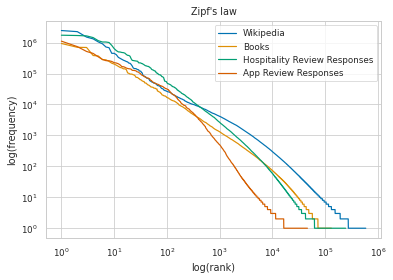

In [50]:
# specify the cmap as colorblind
sns.set(style='whitegrid', palette='colorblind')
# for paper
sns.set_context("paper")

# plot the word rank table as scatter plot
def plot_lexical_frequency_distribution(fdists):
    """
    Plots the lexical frequency distribution of given fdists.

    Args:
        *fdists: One or more Counter objects representing word frequencies.

    Returns:
        None (displays the plot)
    """
    plt.figure(figsize=(6, 4))

    for name, fdist in fdists.items():
        # Sort words by frequency
        sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)

        # Get ranks and frequencies
        ranks = np.arange(1, len(sorted_words) + 1)
        frequencies = [freq for word, freq in sorted_words]

        # Plot on log-log scale
        plt.loglog(ranks, frequencies, label=name)

    plt.xlabel('log(rank)')
    plt.ylabel('log(frequency)')
    plt.title('Zipf\'s law')
    plt.grid(True)

    # Add legend
    plt.legend()

    # save the plot as png and pdf
    plt.savefig('./plots/lexical_frequency_distribution.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.savefig('./plots/lexical_frequency_distribution.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

    return

plot_lexical_frequency_distribution({
        'Wikipedia': wiki_fdist,
        # 'Brown Corpus': brown_fdist,
        'Books': book_fdist,
        'Hospitality Review Responses': hospo_fdist,
        'App Review Responses': app_fdist,
        })


